**Import the necessary libraries required for Exploratory Data Analysis(EDA)**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Read the Global Terrorism dataset using the read_csv**

In [3]:
terrorism = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', error_bad_lines=False)

<ipython-input-3-1d7b810d11f3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  terrorism = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', error_bad_lines=False)


**Importing warning and set it to ignore to ignore the warnings**

In [4]:
import warnings
warnings.filterwarnings("ignore")

**Describing the statistical view of the data**

In [5]:
terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1190.000000,1190.000000,1209.000000,...,0.0,7.000000,0.0,0.0,57.000000,44.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,1.970593e+11,1970.534711,5.662810,14.782645,0.029752,248.118182,3.382645,34.806398,-59.408396,1.075269,...,NaN,116714.285714,NaN,NaN,2.456140,19.954545,-4.604632,-4.496278,0.277916,-3.555831
std,6.215254e+07,0.628153,3.295036,9.185877,0.169973,139.745770,3.410905,20.475755,55.349643,0.529080,...,NaN,131347.775372,NaN,NaN,0.946236,49.230806,4.553673,4.680366,0.757206,4.793283
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,11.000000,1.000000,-37.813187,-157.818968,1.000000,...,NaN,12000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.970053e+11,1970.000000,3.000000,6.000000,0.000000,217.000000,1.000000,34.097866,-95.365295,1.000000,...,NaN,47500.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.970112e+11,1970.000000,5.000000,15.000000,0.000000,217.000000,1.000000,39.930771,-73.931351,1.000000,...,NaN,100000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,1.971061e+11,1971.000000,8.000000,23.000000,0.000000,217.000000,8.000000,42.464047,-5.981749,1.000000,...,NaN,105000.000000,NaN,NaN,2.000000,3.250000,0.000000,0.000000,1.000000,1.000000
max,1.972032e+11,1972.000000,12.000000,31.000000,1.000000,603.000000,12.000000,59.332788,151.206890,5.000000,...,NaN,400000.000000,NaN,NaN,5.000000,187.000000,1.000000,1.000000,1.000000,1.000000


**To find the shape of the dataset**

In [6]:
terrorism.shape

(1210, 135)

**Analysing the data types of the columns**

In [7]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Columns: 135 entries, eventid to related
dtypes: float64(79), int64(7), object(49)
memory usage: 1.2+ MB


**Displaying the columns**

In [8]:
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**Viewing the total number of columns**

In [9]:
terrorism.columns.nunique()

135

**Only taking the columns which are related for the analysis of our dataset**

In [10]:
terrorism = terrorism[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
                       'provstate', 'city', 'attacktype1_txt', 'targtype1_txt',
                       'targsubtype1_txt', 'gname', 'weaptype1_txt']]


In [11]:
terrorism.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
       'city', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'gname',
       'weaptype1_txt'],
      dtype='object')

**Renaming the columns**

In [12]:
terrorism = terrorism.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country',
                       'region_txt':'Region','provstate':'Province_State', 'city':'City', 'attacktype1_txt':'Attacktype', 'targtype1_txt':'Targettype',
                       'targsubtype1_txt':'Target', 'gname':'Gang_name', 'weaptype1_txt':'Weapon'})


In [13]:
terrorism

,Year,Month,Day,Country,Region,Province_State,City,Attacktype,Targettype,Target,Gang_name,Weapon
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1972,3,11,United States,North America,New York,New York City,Facility/Infrastructure Attack,Private Citizens & Property,Political Party Member/Rally,Jewish Armed Resistance,Incendiary
1206,1972,3,12,United Kingdom,Western Europe,Northern Ireland,Belfast,Assassination,Military,Military Unit/Patrol/Convoy,Official Irish Republican Army (OIRA),Firearms
1207,1972,3,13,United Kingdom,Western Europe,Northern Ireland,Belfast,Assassination,Private Citizens & Property,Religion Identified,Ulster Volunteer Force (UVF),Firearms
1208,1972,3,15,United Kingdom,Western Europe,Northern Ireland,Coalisland,Assassination,Police,Police Security Forces/Officers,Irish Republican Army (IRA),Firearms


In [14]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1210 non-null   int64 
 1   Month           1210 non-null   int64 
 2   Day             1210 non-null   int64 
 3   Country         1210 non-null   object
 4   Region          1210 non-null   object
 5   Province_State  1208 non-null   object
 6   City            1210 non-null   object
 7   Attacktype      1209 non-null   object
 8   Targettype      1209 non-null   object
 9   Target          1161 non-null   object
 10  Gang_name       1209 non-null   object
 11  Weapon          1209 non-null   object
dtypes: int64(3), object(9)
memory usage: 113.6+ KB


In [15]:
terrorism.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
Province_State     2
City               0
Attacktype         1
Targettype         1
Target            49
Gang_name          1
Weapon             1
dtype: int64

In [16]:
terrorism['Targettype'] = terrorism['Targettype'].fillna('Unknown')

In [17]:
terrorism['Target'] = terrorism['Target'].fillna('Unknown')

In [18]:
terrorism['Province_State'] = terrorism['Province_State'].fillna('Unknown')

In [19]:
terrorism['City'] = terrorism['City'].fillna('Unknown')

In [20]:
terrorism.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
Province_State    0
City              0
Attacktype        1
Targettype        0
Target            0
Gang_name         1
Weapon            1
dtype: int64

**Statistical Description of the dataset**

In [21]:
terrorism.describe()

,Year,Month,Day
count,1210.000000,1210.000000,1210.000000
mean,1970.534711,5.662810,14.782645
std,0.628153,3.295036,9.185877
min,1970.000000,0.000000,0.000000
25%,1970.000000,3.000000,6.000000
50%,1970.000000,5.000000,15.000000
75%,1971.000000,8.000000,23.000000
max,1972.000000,12.000000,31.000000


**Top 5 afftected Regions**

In [22]:
terrorism['Region'].value_counts().head(5)

North America                 744
Western Europe                225
South America                  91
Middle East & North Africa     90
Eastern Europe                 18
Name: Region, dtype: int64

**Top 5 afftected Country**

In [23]:
terrorism['Country'].value_counts().head(5)

United States         740
United Kingdom        130
Turkey                 48
Uruguay                41
West Germany (FRG)     36
Name: Country, dtype: int64

**Top 5 affected State**

In [24]:
terrorism['Province_State'].value_counts().head(5)

California          220
New York            141
Northern Ireland    124
Montevideo           41
Illinois             38
Name: Province_State, dtype: int64

**Top 5 affected City**

In [25]:
terrorism['City'].value_counts().head(5)

New York City    130
Belfast           75
Los Angeles       43
Montevideo        41
Ankara            33
Name: City, dtype: int64

**Top 5 attacking modes**

In [26]:
terrorism['Targettype'].value_counts().head(10)


Business                       289
Military                       208
Government (General)           130
Police                         127
Educational Institution        105
Private Citizens & Property     94
Government (Diplomatic)         92
Airports & Aircraft             40
Utilities                       31
Journalists & Media             22
Name: Targettype, dtype: int64

**Top 5 attacking Gang Names**

In [27]:
terrorism['Gang_name'].value_counts().head(10)


Unknown                             225
Left-Wing Militants                 165
Irish Republican Army (IRA)          95
Black Nationalists                   82
Student Radicals                     70
Tupamaros (Uruguay)                  41
White extremists                     39
Weather Underground, Weathermen      33
Turkish People's Liberation Army     30
Chicano Liberation Front             26
Name: Gang_name, dtype: int64

**Top 5 weapon types**

In [28]:
terrorism['Weapon'].value_counts().head(10)

Explosives                                                                     635
Incendiary                                                                     276
Firearms                                                                       210
Unknown                                                                         78
Chemical                                                                         4
Melee                                                                            4
Sabotage Equipment                                                               1
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      1
Name: Weapon, dtype: int64

**Most Attacks Happened and its count**

In [29]:
print("Country with the most attacks and count:",terrorism['Country'].value_counts().head(1))
print("City with the most attacks and count:",terrorism['City'].value_counts().index[1])
print("Region with the most attacks and count:",terrorism['Region'].value_counts().head(1))
print("State with the most attacks and count:",terrorism['Province_State'].value_counts().head(1))
print("City with the most attacks and count:",terrorism['City'].value_counts().head(1))
print("Year with the most attacks and count:",terrorism['Year'].value_counts().head(1))
print("Month with the most attacks and count:",terrorism['Month'].value_counts().head(1))
print("Day with the most attacks and count:",terrorism['Day'].value_counts().head(1))
print("Gang with the most attacksand count:",terrorism['Gang_name'].value_counts().head(1))
print("Most attack types and count:",terrorism['Weapon'].value_counts().head(1))

Country with the most attacks and count: United States    740
Name: Country, dtype: int64
City with the most attacks and count: Belfast
Region with the most attacks and count: North America    744
Name: Region, dtype: int64
State with the most attacks and count: California    220
Name: Province_State, dtype: int64
City with the most attacks and count: New York City    130
Name: City, dtype: int64
Year with the most attacks and count: 1970    651
Name: Year, dtype: int64
Month with the most attacks and count: 3    139
Name: Month, dtype: int64
Day with the most attacks and count: 6    60
Name: Day, dtype: int64
Gang with the most attacksand count: Unknown    225
Name: Gang_name, dtype: int64
Most attack types and count: Explosives    635
Name: Weapon, dtype: int64


**Visualization**

In [30]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1210 non-null   int64 
 1   Month           1210 non-null   int64 
 2   Day             1210 non-null   int64 
 3   Country         1210 non-null   object
 4   Region          1210 non-null   object
 5   Province_State  1210 non-null   object
 6   City            1210 non-null   object
 7   Attacktype      1209 non-null   object
 8   Targettype      1210 non-null   object
 9   Target          1210 non-null   object
 10  Gang_name       1209 non-null   object
 11  Weapon          1209 non-null   object
dtypes: int64(3), object(9)
memory usage: 113.6+ KB


**Attacks by day and month**

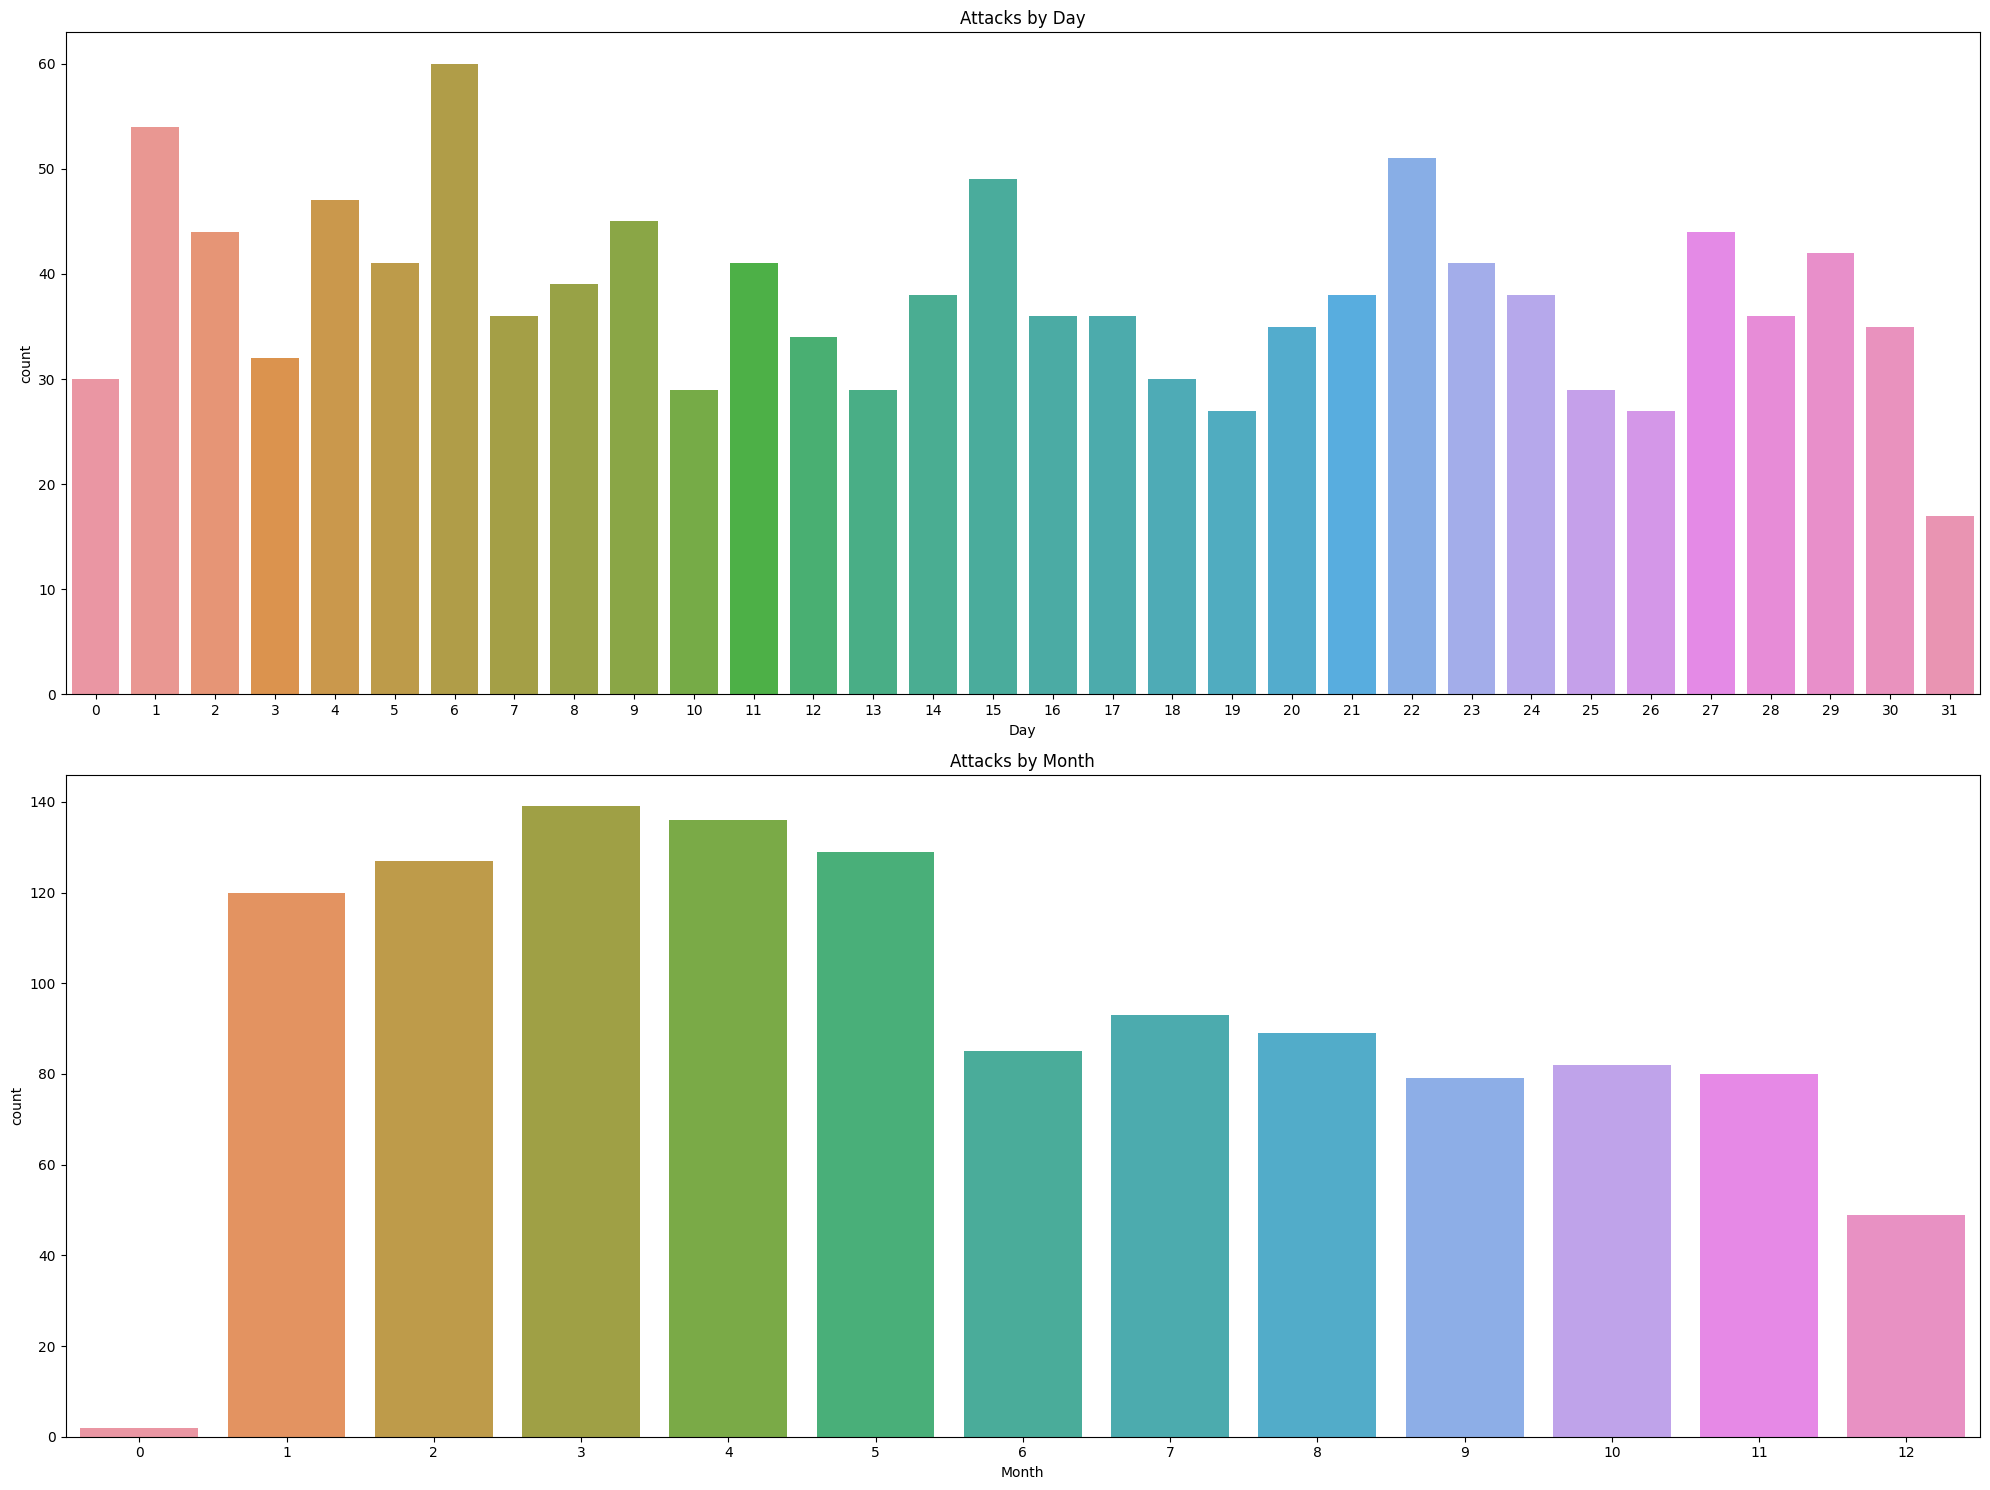

In [31]:
plt.figure(figsize=(20, 15))

titles = ['Attacks by Day', 'Attacks by Month']

columns = ['Day', 'Month']

for i, col in enumerate(columns):
    plt.subplot(2, 1, i + 1)
    plt.title(titles[i])
    sns.countplot(x=terrorism[col])

plt.tight_layout()

plt.show()

**Attacks by Region and Country**

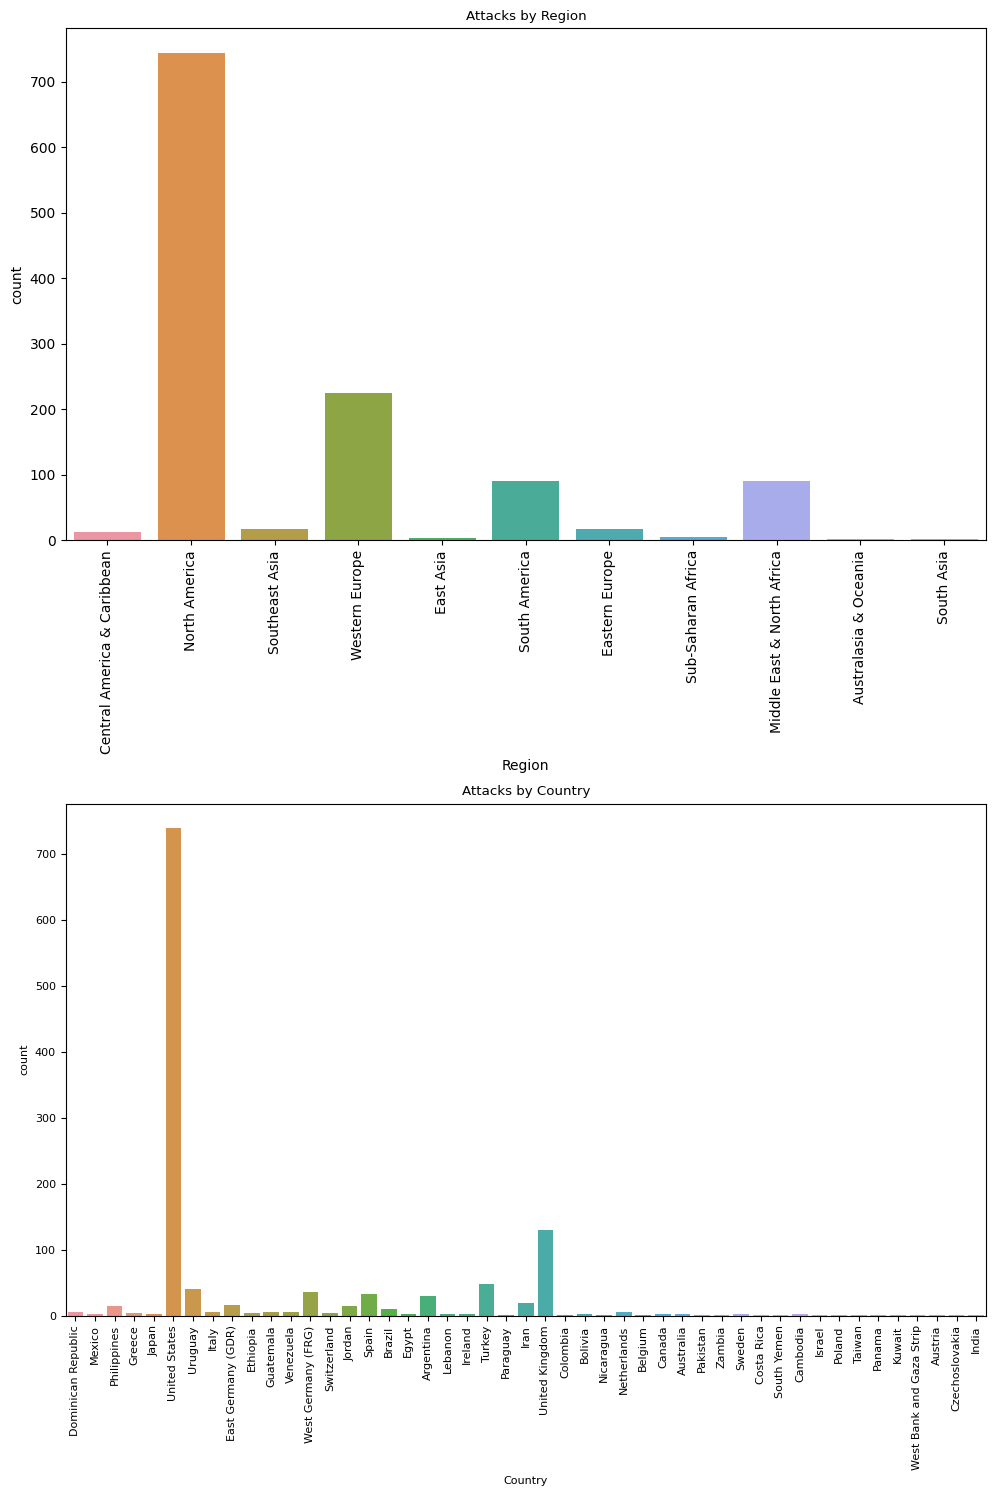

In [32]:
plt.figure(figsize=(10, 15))

# Titles for the plots
titles = ['Attacks by Region', 'Attacks by Country']

# Columns to be used for each plot
columns = ['Region', 'Country']

for i, col in enumerate(columns):
    # Create a subplot for each plot
    plt.subplot(2, 1, i + 1)
    plt.rcParams.update({'font.size':8})
    plt.xticks(rotation=90)
    plt.title(titles[i])
    sns.countplot(x=terrorism[col])

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

**Based on Attack type**

<Axes: title={'center': 'Based on Attack type'}, xlabel='Attacktype', ylabel='count'>

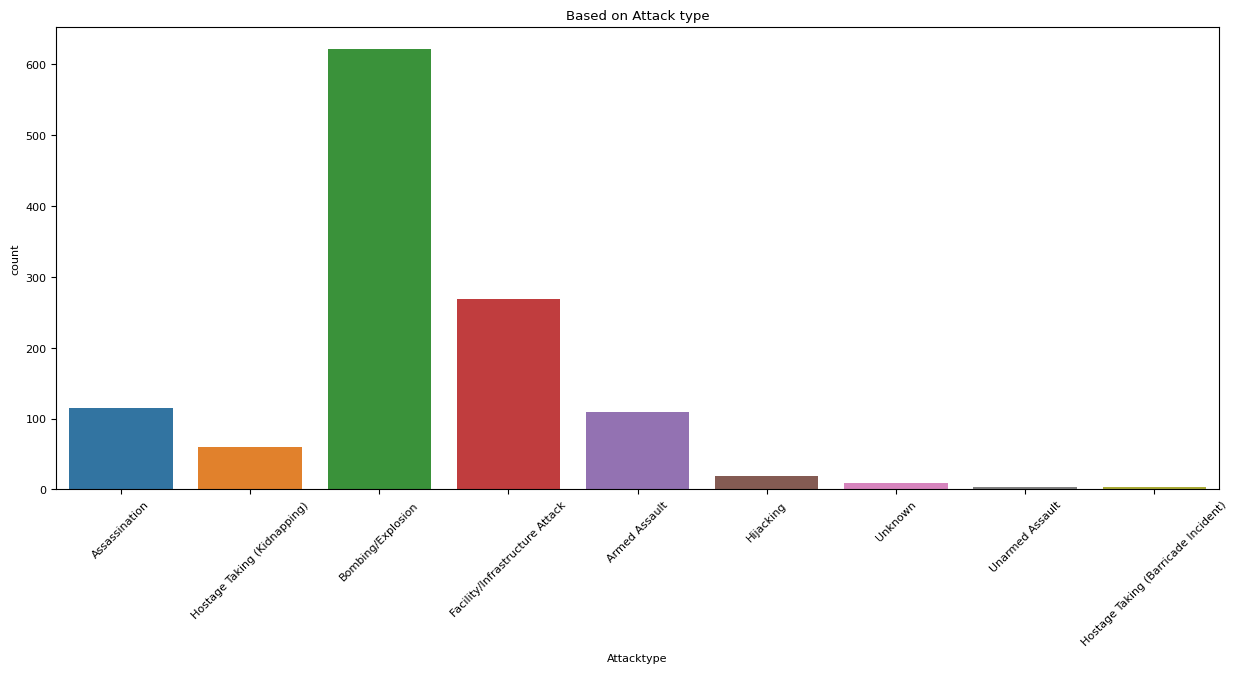

In [33]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
plt.title('Based on Attack type')
sns.countplot(x=terrorism['Attacktype'])

**Based on Target type**

<Axes: title={'center': 'Based on Target type'}, xlabel='Targettype', ylabel='count'>

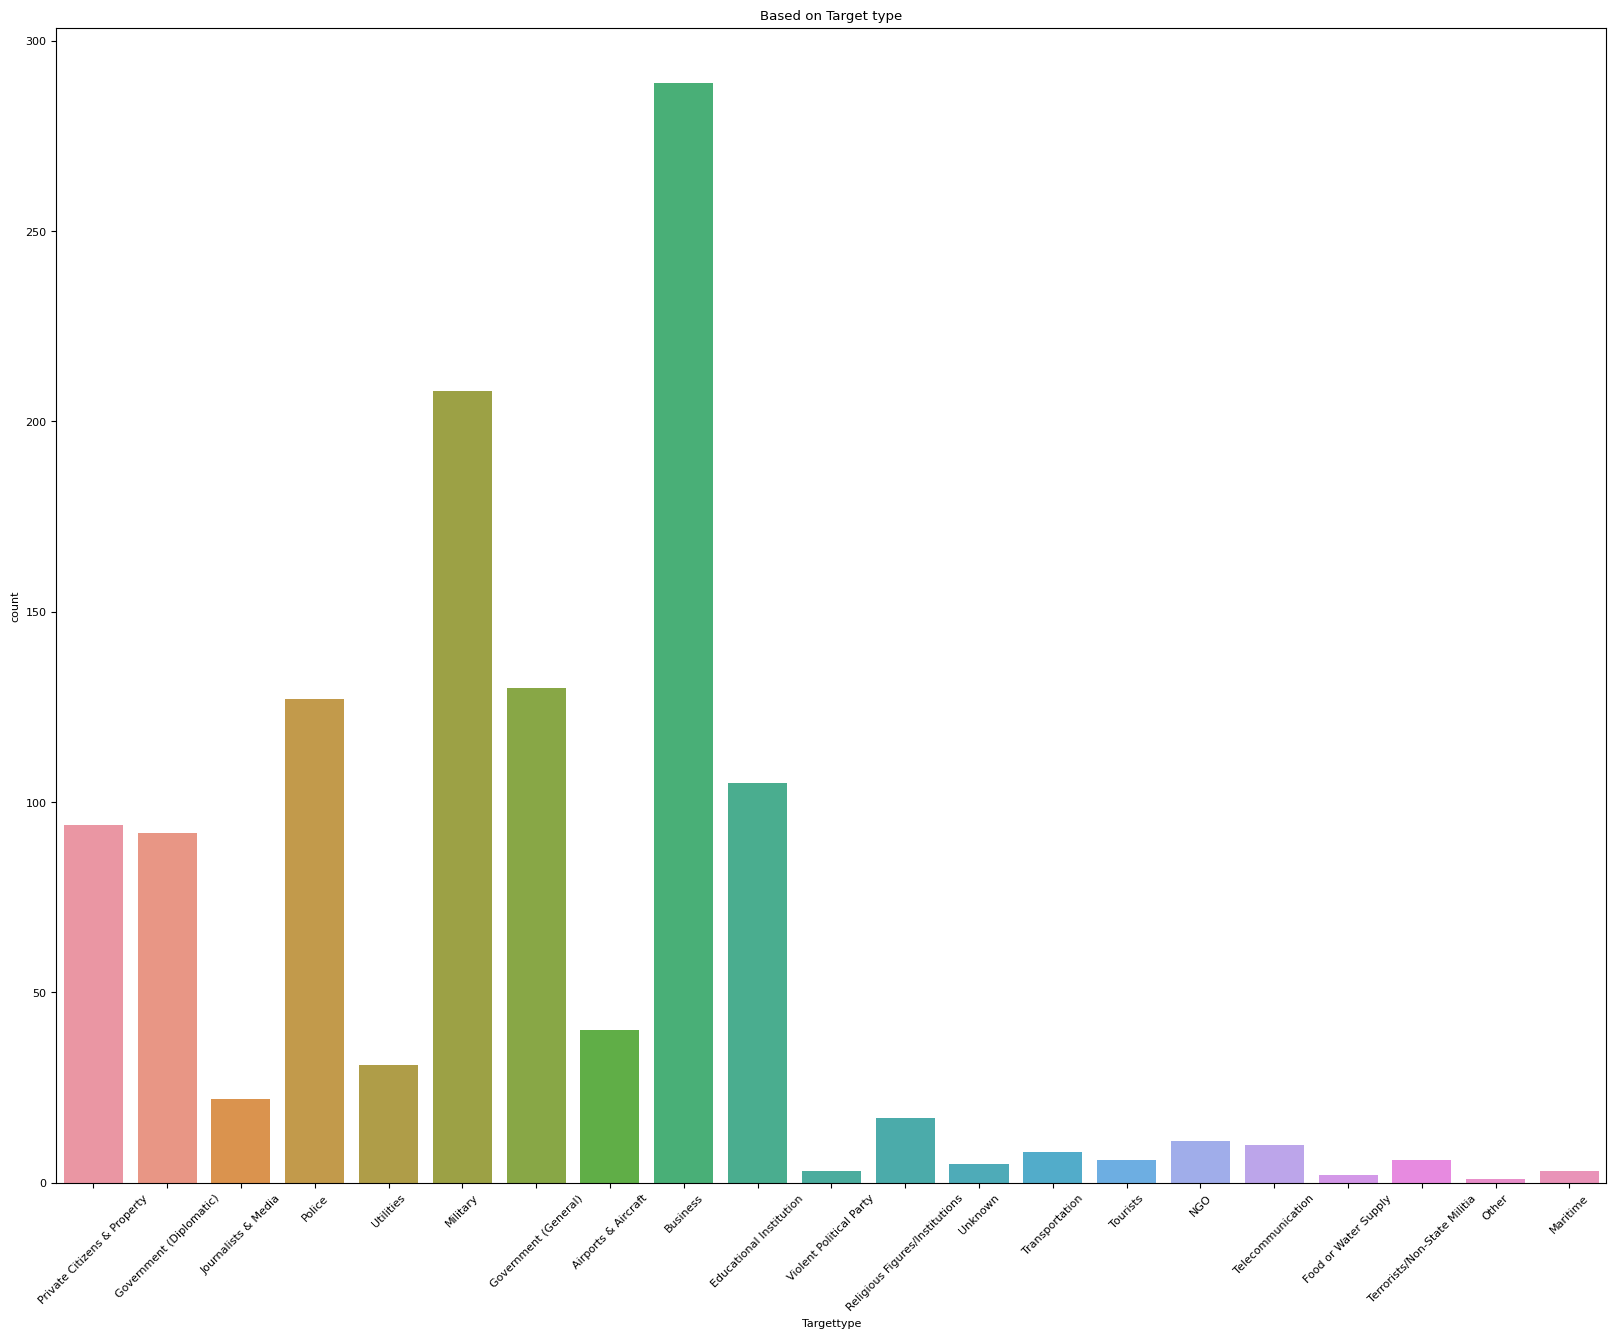

In [34]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
plt.title('Based on Target type')
sns.countplot(x=terrorism['Targettype'])

**Attacks by year**

<Axes: title={'center': 'Attacks by Year'}, xlabel='Year', ylabel='count'>

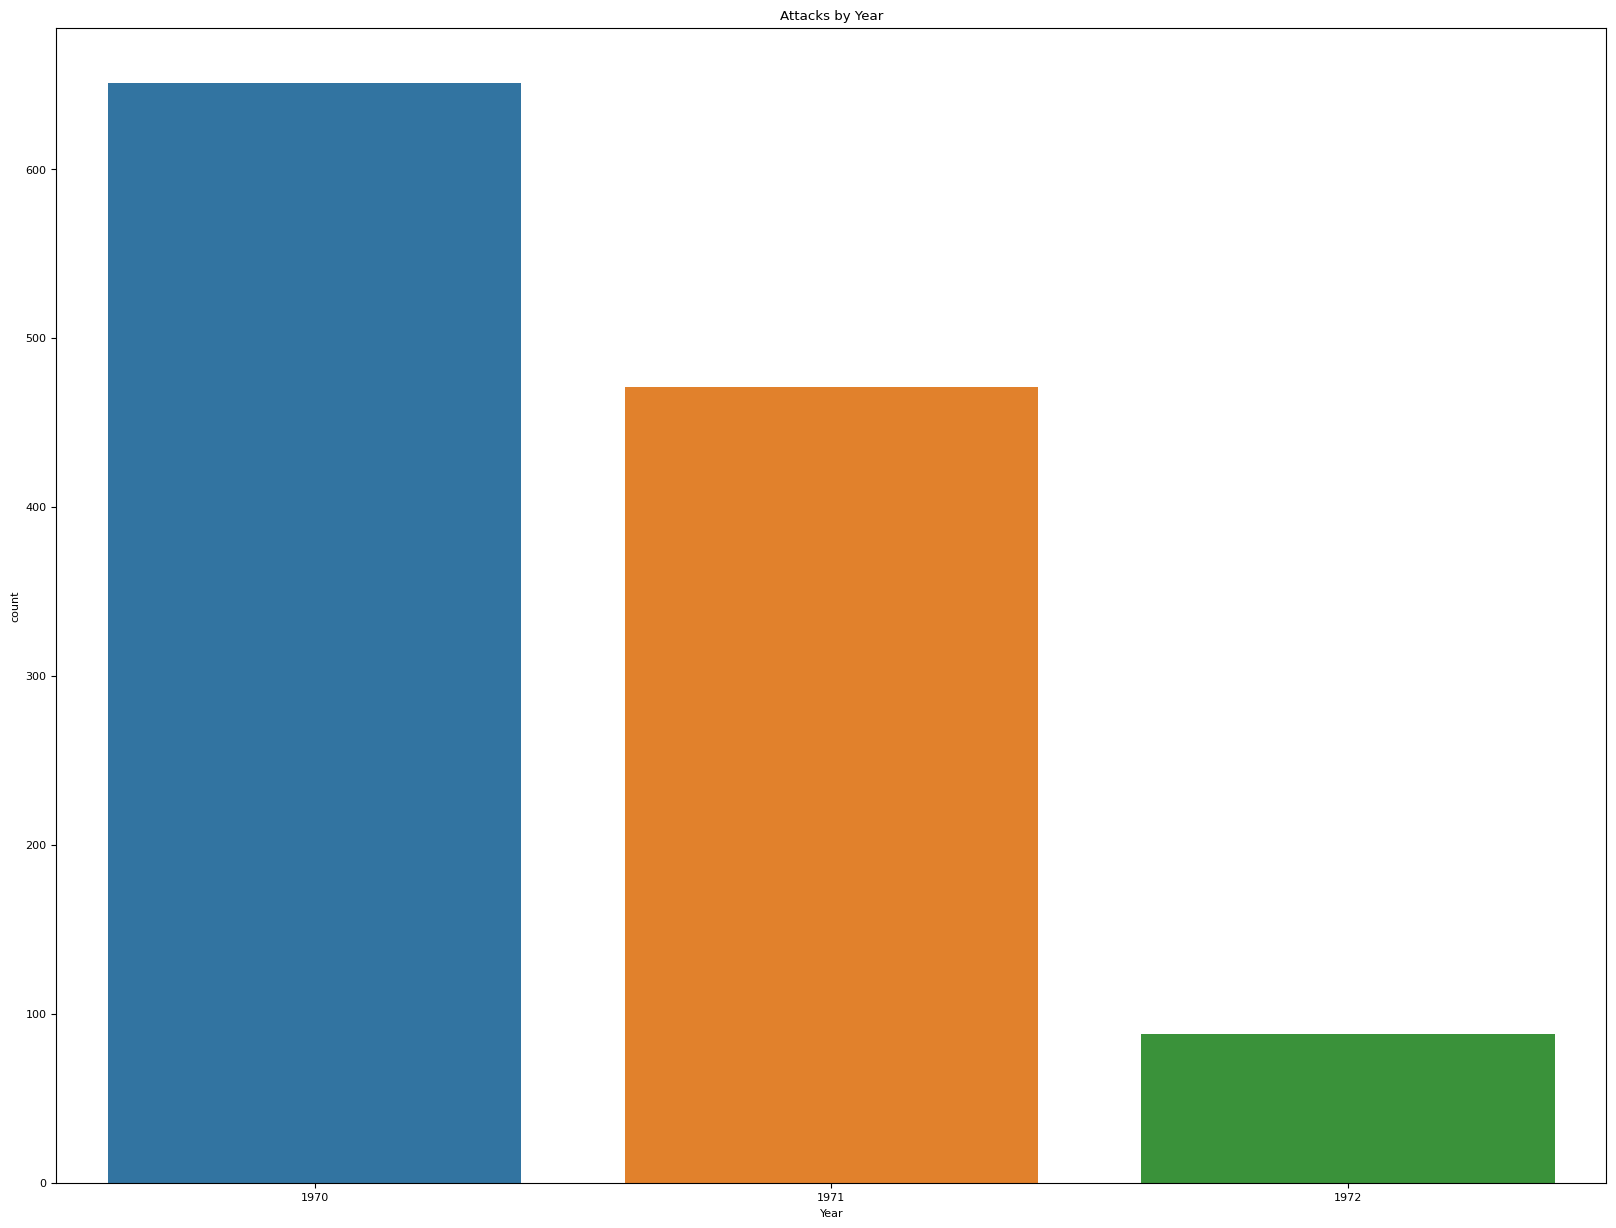

In [35]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=360)
plt.title('Attacks by Year')
sns.countplot(x=terrorism['Year'])

**Terrorist Activities by Region in each Year**

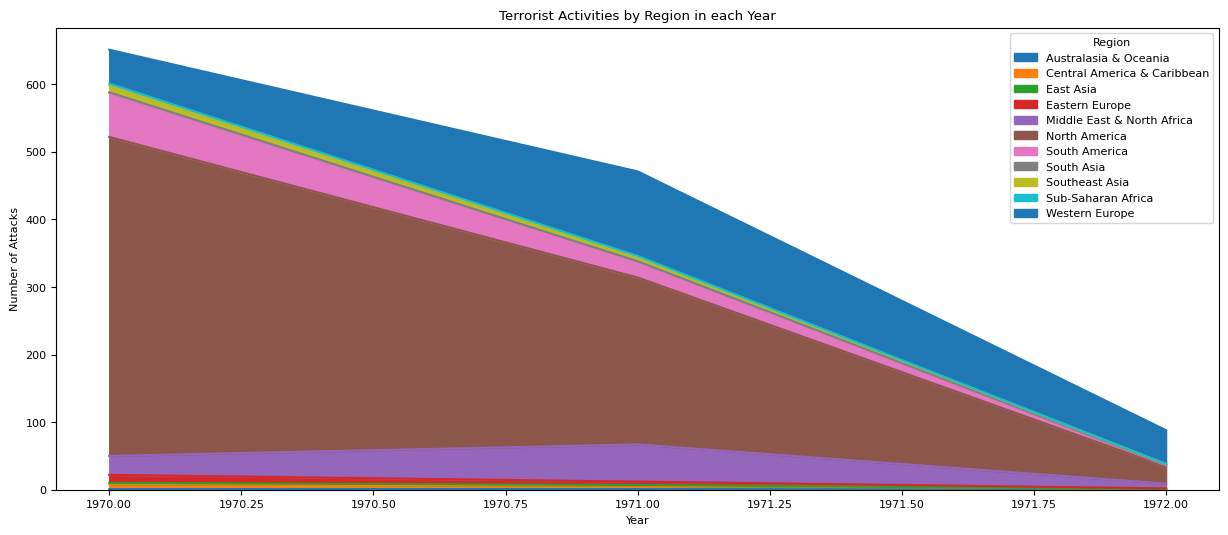

In [36]:
pd.crosstab(terrorism.Year, terrorism.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()